In [6]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size':14}) 

# Solution: Pulse on a wire

This exercise combines a few Python concepts that you've covered so far: functions, plotting and arrays.

The first part is straight forward. We can set up a function for $y(x)$ and plot it for $-0.1$ m $< x < 0.1$ m.

Text(0, 0.5, '$y(x)$ (m)')

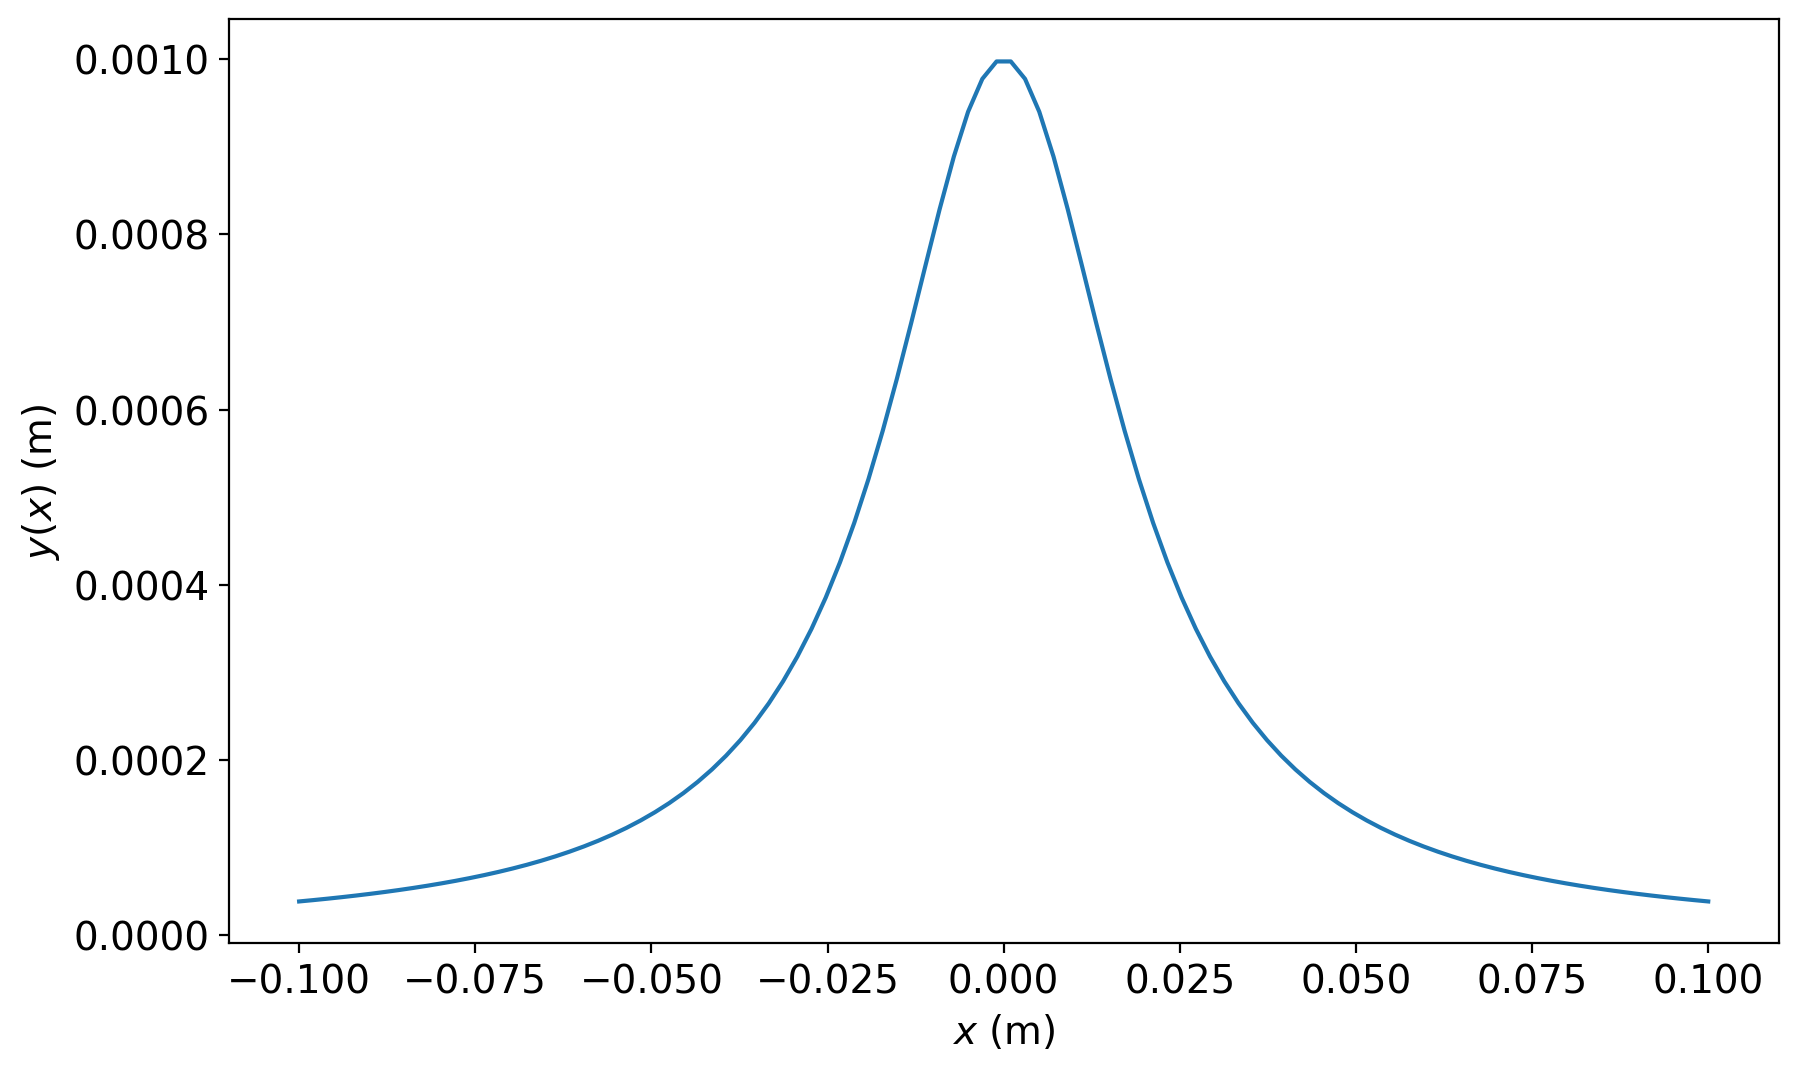

In [7]:
def pulse(x):
    y = (4e-3) / ((100 * x)**2 + 4)
    return(y)

x = np.linspace(-0.1, 0.1, 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x, pulse(x))
ax.set_xlabel('$x$ (m)')
ax.set_ylabel('$y(x)$ (m)')


For the next part we have to find a new expression for $y(x, t)$. This is where markdown cells come in handy. 

We could write all the maths out properly in markdown, but what if it's super complicated and we keep getting confused by the number of brackets? We can just write it out by hand, take a picture and add that to our markdown cell. **Note**: If you're writing a lab report or something more formal, you should type up the equations properly, but if you're just making notes to yourself, it's perfectly fine to do this.

See the [Electronic Lab Books](02_intro_to_markdown.ipynb) section if you need help adding an image.

```{image} images/pulse_maths.png
:width: 500px
:align: center
```

Now we can define a new function `displacement`:

In [8]:
def displacement(x, t, v):
    y = (4e-3) / ((100 * (x - v*t))**2 + 4)
    return(y)

And we can plot the displacement as a function of time for $x=0.1$ m, $v = 2$ m s$^{-1}$.

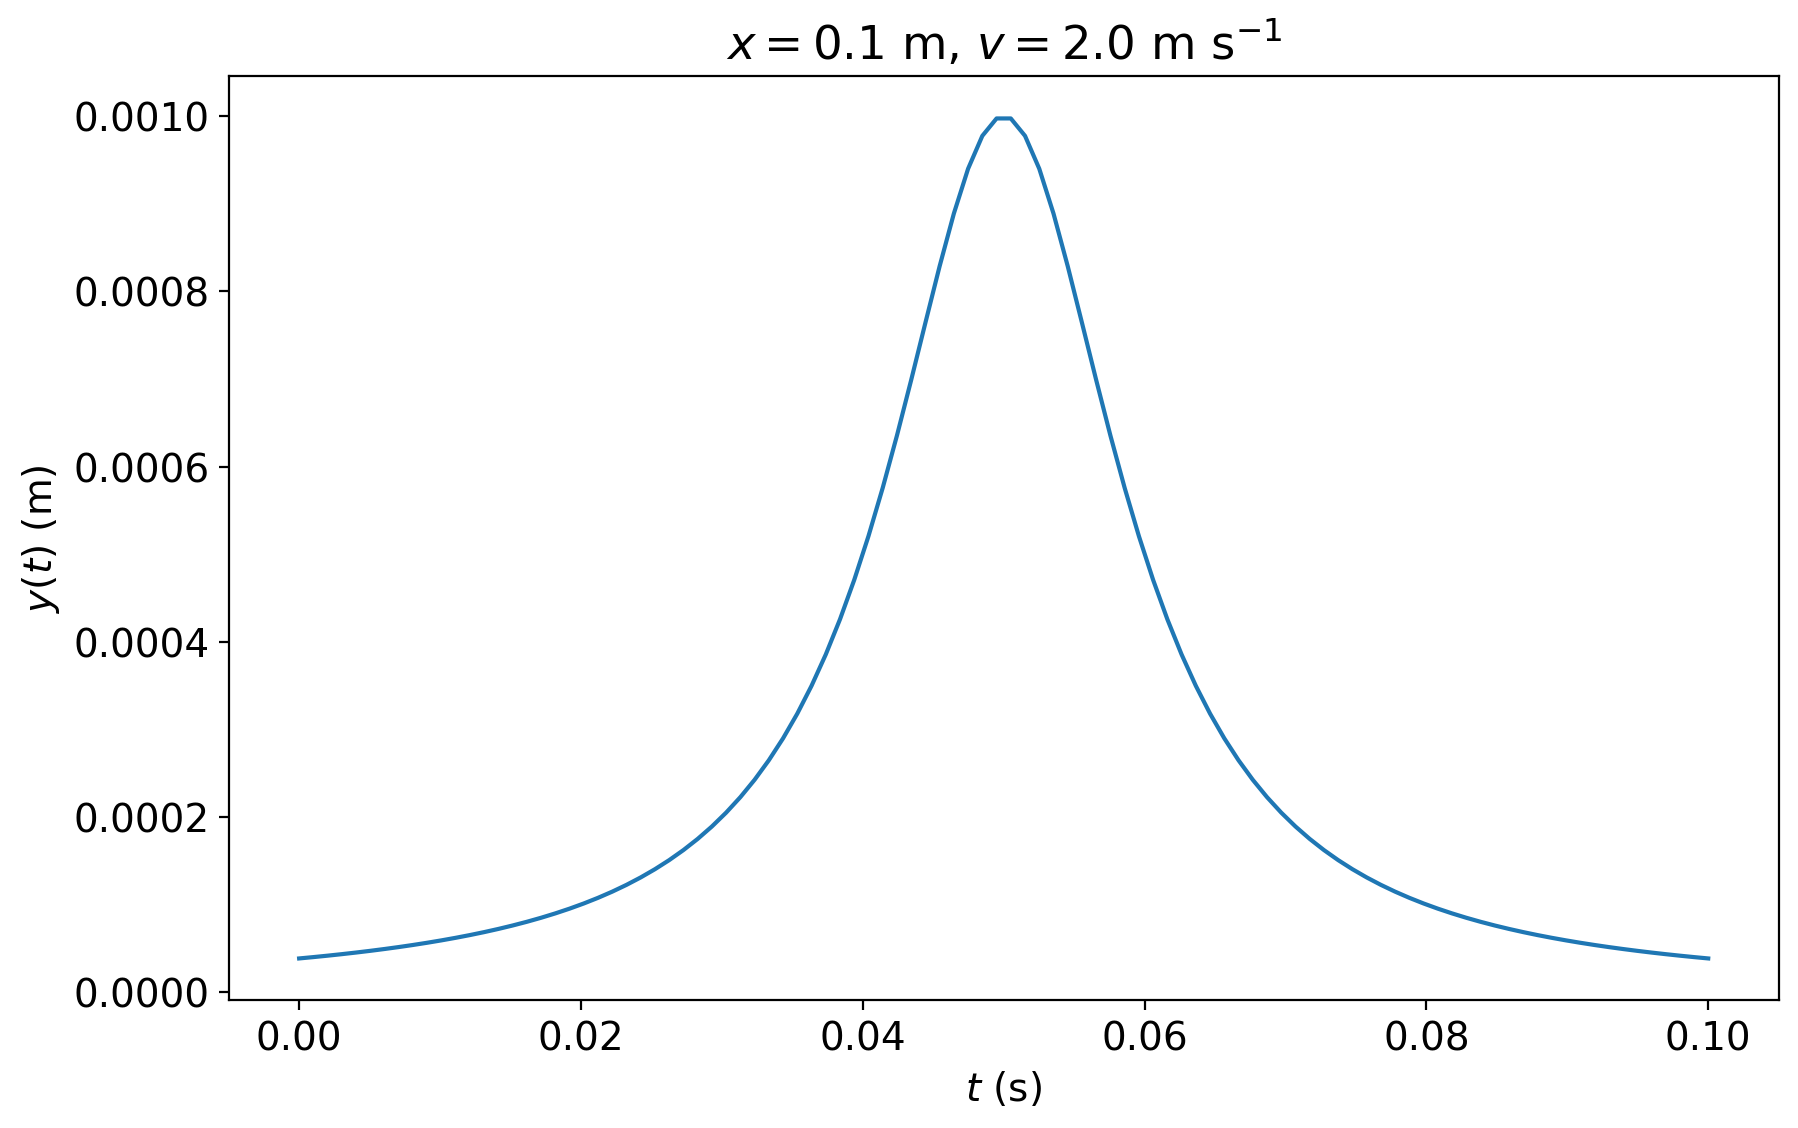

In [9]:
t = np.linspace(0, 0.1, 100)

x_0 = 0.1
v = 2

fig = plt.figure(figsize=(10,6))
ax2 = fig.add_subplot(1,1,1)
ax2.plot(t, displacement(x_0, t, v))
ax2.set_xlabel('$t$ (s)')
ax2.set_ylabel('$y(t)$ (m)')
title_string = '$x = {0:.1f}$ m, $v = {1:.1f}$ m s$^{{-1}}$'.format(x_0, v)
ax2.set_title(title_string)
plt.show()


The last part of the question uses some tricks with arrays. This won't give you an **exact** answer, but it's a good way to check if the answer you've worked out numerically is reasonable. 

When we made the figure above we set up an array of times:
```py
t = np.linspace(0, 0.1, 100)
```
This gives us an array, `t`, with 100 equally spaced values between 0 and 0.1.

Instead of plotting `displacement(x_0, t, v)` we can save the output as an array, `y_vals`

In [10]:
y_vals = displacement(x_0, t, v)

One of the useful things about arrays is that you can use logical expressions when you index them. It's simple to get the values of `y_vals` that are larger than 0.5 mm:

In [11]:
y_vals[y_vals > 0.5e-3]

array([0.00052061, 0.00057565, 0.00063536, 0.00069877, 0.00076415,
       0.00082877, 0.0008889 , 0.00094005, 0.00097756, 0.00099746,
       0.00099746, 0.00097756, 0.00094005, 0.0008889 , 0.00082877,
       0.00076415, 0.00069877, 0.00063536, 0.00057565, 0.00052061])

What we want to know is the **time** when the displacement is greater than 0.5 mm. Because our two arrays are the same shape we can use the same logical expression to index the `t` array:

In [12]:
t[y_vals > 0.5e-3]

array([0.04040404, 0.04141414, 0.04242424, 0.04343434, 0.04444444,
       0.04545455, 0.04646465, 0.04747475, 0.04848485, 0.04949495,
       0.05050505, 0.05151515, 0.05252525, 0.05353535, 0.05454545,
       0.05555556, 0.05656566, 0.05757576, 0.05858586, 0.05959596])

Now we have all the times that the displacement is greater than 0.5 mm. To get the first one, we just slice the array to get the first value:

In [13]:
t_d_over_5mm = t[y_vals > 0.5e-3][0]
print(t_d_over_5mm)

0.0404040404040404


This isn't the exact answer you'd get if you worked through the maths (the exact answer is $t=0.04$ s). How close we are to the true answer depends on how small our time steps are when we set up the `t` array. But it is useful as an approximation. 

You can play around with your code to see how changing the number of time steps affects your answer. See how it changes when you use 10, 100 or 10000 steps. 

[back to the exercises](ex-pulse)